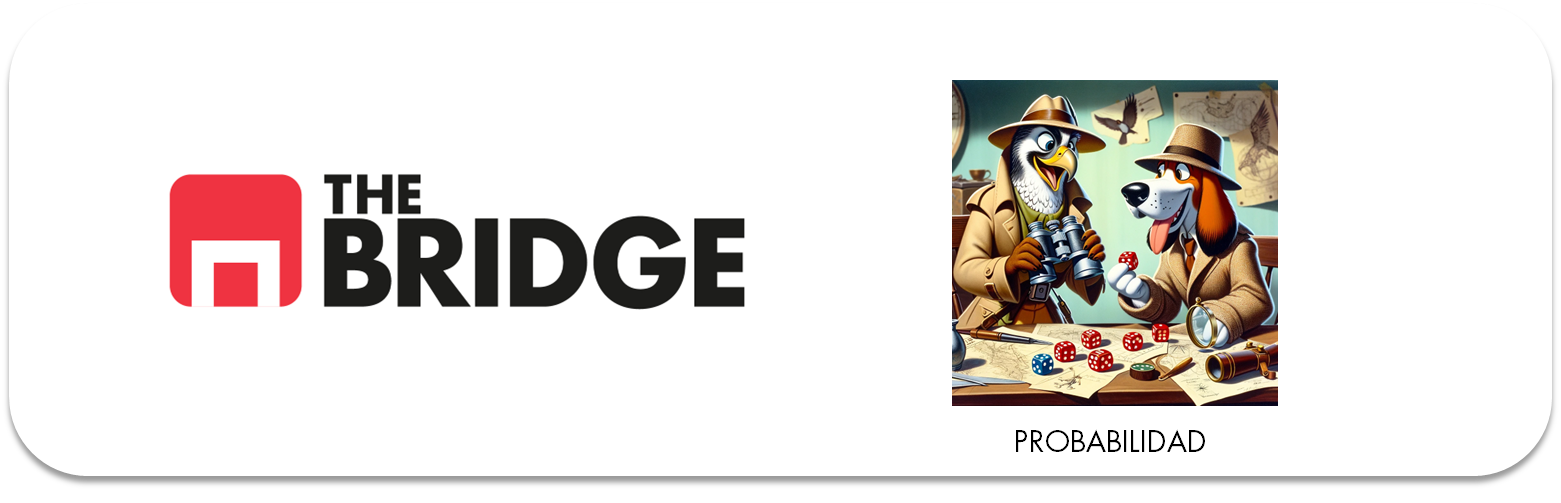

## PROBABILIDAD (I): Conceptos básicos y cálculo frecuencial

Para la primera parte de la probabilida vamos a centrarnos en los datos del Titanic, y a emplear nuestras bibliotecas favoritas:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_titanic = pd.read_csv("./data/titanic.csv")


En esta sesión vamos a empezar a engarzar ya la estadística inferencial y nuestro próximo objetivo final: tomar decisiones a partir de los datos para situaciones "nuevas" no necesariamente contempladas anteriormente.

Vamos a querer saber no ya cuanta gente murió en el Titanic o su ratio de supervivencia, sino si de repente nos dicen que hubo un pasajero X no contemplado en nuestros datos, ¿podríamos decir si murió o no?¿De qué puerto salió?¿Viajaba en primera o en tercera? Claro para hechos pasados parece menos interesante, salvo que tu campo sea precisamente el estudio del pasado.   

Pero, si has hecho el EDA sobre el precio de las casas en los últimos 10 años, lo que te interesará es poder usar esos datos para poder decidir dónde comprar en los próximos tres años, por ejemplo. ¿Y como se responde a eso? De forma definitiva e inequívoca es imposible, pero a partir de los datos que has usado puedes inferir (si con estadística inferencial) una serie de características de lo que serán esas casas en los próximos tres años, cuánto son de fiables tus datos y tener una idea de que zonas tienen mejores posibilidades de ser buena inversión y cuáles no. Es decir, **estimar la probabilidad** para cada zona de que sean buenas o no o cuánto de buenas para la inversión y sobre eso tomar una decisión. Y ahí es dónde entra la probabilidad como herramienta para tomar decisiones antes situaciones cuya complejidad nos impide utilizar fórmulas matemáticas precisas.


### Preguntas guía

Para guiarnos en esta sesión, vamos a plantearos algunas preguntas a resolver con nuestros datos:

1. ¿Cuál es la probabilidad de que una persona elegida al azar sobreviviese en el Titanic?
2. ¿Cuál es la probabilidad de que una persona elegida al azar se embarcase en Queenstown?
3. ¿Cuál es la probabilidad de que una persona elegida al azar fuese hombre o viajese en primera clase?
4. ¿Cuál es la probabilidad de que una persona elegida al azar viajese en primera clase y viajase sola?
5. ¿Cuál es la probabilidad de que una persona elegida al azar se salvase y viajase en tercera clase? 

Lo primero será definir o formalizar el concepto de rpobabilidad con el que hemos jugado sin profundizar.

### ¿Qué es la probabilidad?

*Formalmente*: **La [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) mide la mayor o menor posibilidad de que se dé un determinado resultado (suceso o evento) cuando se realiza un experimento aleatorio.**

Como experimentos aleatorios nos entran en la cabeza fácilmente la lotería o tirar un dado de varias caras. Pero un experimento aleatorio también es escoger una persona al azar de entre los pasajeros del titanic (al azar == no intencionadamente esa persona en concreto) y también (aunque ahora parezca contradictorio), escoger una persona al azar aunque con características determinadas [escoger una pasajero del Titanic de entre los que embarcaron en Southampton y tenían más de 20 años, siempre que una vez seleccionados los pasajeros con esas características escogieramos "sin mirar al pasajero en cuestión].

En este sentido nuestras preguntas entran dentro de lo que denominaríamos un experimento aleatorio. 

Para **calcular la probabilidad** de un evento se toma en cuenta **todos los casos posibles** de ocurrencia del mismo; es decir, de cuántas formas puede ocurrir determinada situación. Los **casos favorables** de ocurrencia de un evento serán los que cumplan con la condición que estamos buscando. La *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* toma valores entre 0 y 1 (o expresados en tanto por ciento, entre 0% y 100%). Esto es lo que se denomina un cálculo frecuencial y es lo que se conoce como **regla de Laplace** [Para que tengas un culturilla saludable]:

$$p(A) = \frac{favorables}{posibles}$$


Con esto ya estamos en disposición de poder dar contestación a nuestras dos primeras preguntas:

Para la primera preguntas buscasmos el número de casos favorables (pasajeros que sobrevivieron) frente al total de pasajeros: 

In [ ]:
casos_favorables =len(df_titanic.loc[df_titanic["alive"] == "yes"]) # Casos favorables: el número de personas que sobrevivieron
casos_totales = len(df_titanic)
print("p(sobrevivir de una persona elegida al azar) = ", casos_favorables/casos_totales)

Y también, aquí es donde tenemos que tener en cuenta nuestros intervalos de confianza y demás, porque debemos partir del caso de que nosotros trabajamos con los datos muestrales, con lo que nuestras probabilidades obtenidas con muestras deberían ser consideradas dentro de un rango (pero esto no lo vamos a respetar, life is hard...)

La segunda pregunta se resolvería de forma análoga:

In [ ]:
casos_favorables =len(df_titanic.loc[df_titanic["embark_town"] == "Queenstown"]) # Casos favorables: el número de personas que embarcaron en Queenstown
casos_totales = len(df_titanic)
print("p(Queenstown de una persona elegida al azar) = ", casos_favorables/casos_totales)

Para que pienses un poco, ¿se vería afectado este cálculo si en vez de partir de todos los datos, la población, lo hacemos de una muestra?

### Espacio muestral, Suceso, unión de sucesos e intersección de sucesos:


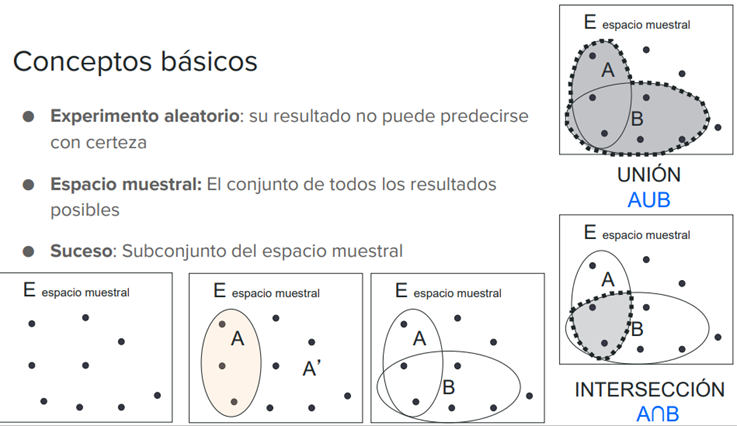

#### Espacio muestral

El **espacio muestral** es el conjunto de todos los resultados posibles en un "experimento" aleatorio:
1. Caso de lanzar un dado de seis caras UNA vez. El espacio muestral es: $S= \{1,2,3,4,5,6\}$
2. Caso de lanzar una moneda UNA vez. El espacio muestral es: $S = \{cara, cruz\}$
3. Caso de lanzar una moneda DOS veces seguidas. El espacio muestral es: $S = \{(cara,cara),(cara,cruz),(cruz,cara),(cruz,cruz)\}$ 
3. Caso de escojer una persona al azar del Titanic para ver si sobrevivió... Piénsalo...

No, no es $S=\{sobrevivió, murió\}$

Aunque pueda parecerlo por los ejemplos anteriores el espacio muestral en el caso de la supervivencia del titanic son todos los valores posibles y en ese caso como estamos escogiendo un pasajero habrá tantos casos posibles como pasajeros (fijate en el caso de lanzar dos veces una moneda, el resultado no es cara o cruz sino el combinado):  
$$S_{titanic} = \{sobrevivió, murió, murió, murió, sobrevivió,.....\} \; \text{así hasta los 891 de nuestro dataset}$$

Es decir el espacio muestral será:

In [ ]:
df_titanic["alive"].str.replace("yes","sobrevivió").replace("no","murió").values

Cuando trabajamos con datasets (conjuntos de datos) podemos asimilar el espacio muestral a dicho dataset para cada una de las características que tiene cada elemento del dataset o para su combinado.

#### Suceso

Un suceso es un subconjunto de un espacio muestral. Ejemplos de sucesos "sencillos" (subconjuntos de un único elemento):

1. En el caso de lanzar un dado... cada una de las caras que pueden salir. Es decir un suceso será "sacar un 4", otro "sacar un 1", etc
2. En el caso de lanzar una moneda, tendríamos dos sucesos sencillos ("sacar cara", "sacar cruz")

No todos los sucesos tienen por qué ser "sencillos". Piensa en el caso de lanzar una moneda dos veces seguidas, podemos definir el suceso sacar cara en alguna de las tiradas. ¿Como se definiría ese suceso?:

$$A_{sacar-cara} = \{(cara,cara),(cara,cruz),(cruz,cara)\}$$

[Los sucesos o eventos se denotan normalmente por las letras A, B, C, etc]

Y siguiendo la regla de Laplace, la probabilidad sería...

$$casos\ favorables = card(Suceso) = 3$$
$$casos\ posibles = card(Espacio Muestral) = 4$$
$$p(\text{sacar una cara lanzando una moneda dos veces}) = \dfrac{3}{4} = 0.75$$

Y en el caso del titanic, tenemos dos posibles Sucesos (que corresponden con los valores de la variable categórica): "Sobrevivir", "Morir". Pero ninguno es sencillo. Cuando se da el caso de que dos o más eventos o sucesos no pueden ocurrir a la vez, se dice que son ***mutuamente excluyentes*** y la suma de sus probabiliddes debe ser igual a la unidad (o al 100% si trabajamos con porcentajes).


#### Unión e interscción de sucesos 

* **Unión:** La unión de varios sucesos sencillos crea un evento compuesto que **ocurre si uno o más de los eventos ocurren** (es como un "OR"). La unión de $A$ y $B$ se escribe $A \cup B$ y significa "Ya sea $A$ o $B$, o ambos $A$ y $B$."

* **Intersección:** La intersección de dos o más eventos simples crea un evento compuesto que **ocurre sólo si ocurren todos los eventos simples** (es como un "AND"). La intersección de $A$ y $B$ se escribe $A \cap B$ y significa "$A$ y $B$."

Ojo, a partir de la definición anterior puede haber unión e intersección de cualquier tipo de suceso y la probabilidad siempre se puede calcular igual: cardinalidad del resultado dividida por cardinalidad total (casos favorables entre casos posibles)

Con esto ya casi podemos obtener la respuesta a nuestras tres últimas preguntas iniciales, pero antes un par de ejemplos para ilustrar los conceptos anteriores:

##### Ejemplo con monedas

Supongamos que tenemos el "experimento" lanzar una moneda dos veces seguidas. Recuerda que su espacio muestral era:

$$S_{sacar-cara} = \{(cara,cara),(cara,cruz),(cruz,cara),(cruz,cruz)\}\ \text{4 posibles casos}$$

Y dos sucesos:
$$ A = \text{sacar una sóla cara} = \{(cara,cruz),(cruz,cara)\} $$
$$ B = \text{sacar cruz la segunda vez} = \{(cruz,cruz), (cara,cruz)\}$$

Calculemos los sucesos unión e intersección y la probabilidad de cada uno: 

$$A \cup B = \{(cara,cruz),(cruz,cara),(cruz,cruz)\}\  \text{3 casos favorables}$$  

$$p(A \cup B) = \frac{3}{4} = 0.75$$

La probabilidad de "sacar una sóla cara o sacar cruz la segunda vez" es de 0.75

$$A \cap B = \{(cara,cruz)\}\ \text{1 solo caso favorable}$$


$$p(A \cap B) = \frac{1}{4} = 0.25$$

La probabilidad de "sacar una sóla cara y cruz la segunda vez" es de 0.25

##### Ejemplo con dos variables diferentes

Imagina que tu espacio muestral son 9 personas, de los cuales tienes 5 ciudadanos españoles (A), y 4 de pelo castaño (B).




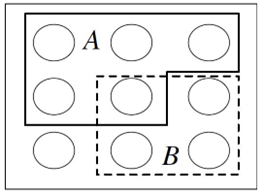

Escogiendo una persona al azar del espacio muestral:

* ¿Cuál es la probabilidad que sea un ciudadano español? $P(A)$ = 5/9 
* ¿Cuál es la probabilidad de que tenga el pelo castaño? $P(B)$ = 4/9 
* ¿Cuál es la probabilidad de que sea español o tenga el pelo castaño? $P(A \cup B)$ = 8/9
* ¿Cuál es la probabilidad de que sea español y tenga el pelo castaño? $P(A \cap B)$ = 1/9
* ¿Cuál es la probabilidad de que no sea español? $P(\sim{A})$ = 4/9 (también se le dice suceso complementario de A)

#### Aplicación a nuestro dataset

Y ahora podemos aplicarlo directamente a nuestro dataset y a las preguntas:

3. ¿Cuál es la probabilidad de que una persona elegida al azar fuese hombre o viajese en primera clase?


[Intuitivamente puede que ya tengas claro cómo contestar pero aquí lo vamos a hacer ligándolo a los conceptos que hemos visto] 

Se trataría de la unión de dos sucesos (fíjate en el "o" de la pregunta):

$$ A = \text{"Suceso persona elegida sea hombre"}$$
$$ B = \text{"Persona elegida viajaba en primera clase"}$$



En la siguiente sesión veremos como obtener las probabilidades sucesos unión a partir de sus sucesos originales pero por ahora lo que vamos a hacer es seguir aplicando casos favorables dividido por casos totales:

In [ ]:
df_titanic.columns

In [ ]:
# Como es una unión es como aplicar un "OR" a las dos condiciones:
ser_hombre = df_titanic.who == "Male"
viajar_primera = df_titanic["class"] == "First"
casos_favorables = len(df_titanic[ser_hombre | viajar_primera]) # Esto equivale a calcular la cardinalidad del conjunto unión
casos_totales = len(df_titanic)

print(f"p(ser hombre o viajar en primera) = {round(casos_favorables/casos_totales * 100,2)}%")

$$p(\text{de escoger a una persona y ser hombre o viajar en primera}) = p(A \cup B) = 24.24\%$$

4. ¿Cuál es la probabilidad de que una persona elegida al azar viajese en primera clase y viajase sola?

En este caso estamos hablando de la interesección de dos sucesos (fíjaete en el "y"):

$$A = \text{"viajar en primera clases"}$$
$$B = \text{"viajr sola"}$$

Buscamos:

$$p(\text{viajar en primera y viajar sola}) = p(A \cap B)$$

In [ ]:
#Como es una intersección es aplicar un AND:
viajar_sola = df_titanic.alone
viajar_primera = df_titanic["class"] == "First"
casos_favorables = len(df_titanic[viajar_sola & viajar_primera]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(de escoger a una persona que viajara en primera, sola) = {round(casos_favorables/casos_totales * 100,2)}%")


$$p(\text{de escoger a una persona que viajara en primera, sola}) = p(A \cap B) = 12.23\%$$

Y para terminar: ¿Cuál es la probabilidad de que una persona elegida al azar se salvase y viajase en tercera clase? 

In [ ]:
#Como es una intersección es aplicar un AND:
superviviente = df_titanic.alive == "yes"
viajar_tercera = df_titanic["class"] == "Third"
casos_favorables = len(df_titanic[superviviente & viajar_tercera]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(sobrevivir y viajar en tercera) = {round(casos_favorables/casos_totales * 100,2)}%")

$$p(\text{escoger a alguien que viajara en tercera y sobreviviera}) = p(A \cap B) = 13.36\%$$

Ojo NO hemos calculado la probabilidad de que sabiendo que viajaba en tercera se salvase. Eso es lo que se llama probabilidad condicionada y la veremos en la siguiente sesión. Pero para que no te quedes con las ganas y lo vayas pensando, sería (de nuevo considerando casos favorables y casos posibles):

In [ ]:
# Al poner la condición de que viaja en tercera, lo que hacemos es reducir el espacio muestral y por tanto el denominador (al reducir la cardinalidad y por tanto el número de casos posibles)
casos_favorables = len(df_titanic[superviviente & viajar_tercera]) # Igual que antes son todos los que viajaban en tercera y se salvaron
casos_totales = len(df_titanic.loc[df_titanic["class"] == "Third"]) # Aquí está la diferencia, como sabemos que va en tercera, los casos posibles son solo los que van en tercera
print(f"p(habiendo viajado en tercera, sobrevivir) = p(sobrevir de los pasajeros de tercera) = {round(casos_favorables/casos_totales * 100,2)}%")